# Project: Predicting Student Stress Levels

This notebook analyzes factors contributing to student stress and builds a predictive model to identify a student's stress level.

## 1. Data Loading and Initial Exploration

In [ ]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set some visual options
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
df = pd.read_csv('/content/sample_data/StressLevelDataset.csv')

df.head(5)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [ ]:
# Overview of data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
# Get summary stats for all numeric columns
df.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


In [ ]:
# See how many unique values each column has
df.nunique()

,0
anxiety_level,22
self_esteem,31
mental_health_history,2
depression,28
headache,6
blood_pressure,3
sleep_quality,6
breathing_problem,6
noise_level,6
living_conditions,6


In [ ]:
# Check the value counts for the target variable
df['stress_level'].value_counts().sort_index()

,count
stress_level,
0,373
1,358
2,369


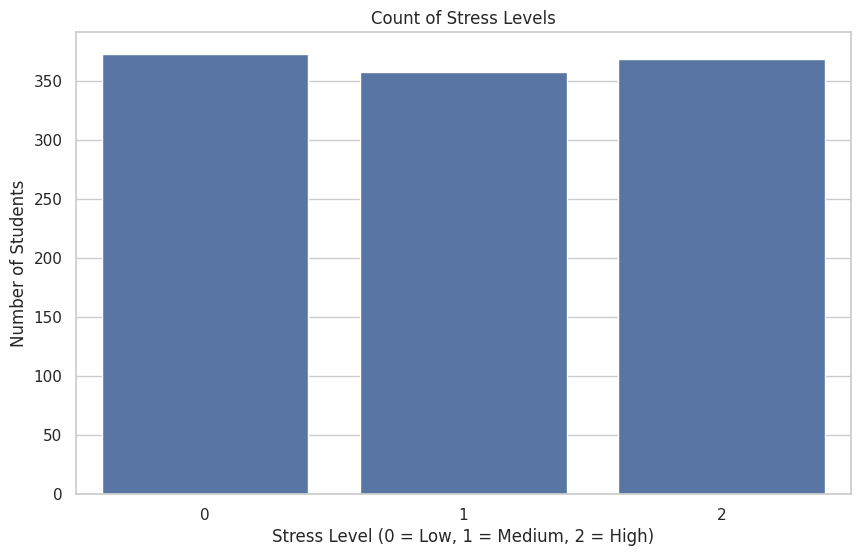

In [ ]:
# Countplot of Stress Levels
sns.countplot(x='stress_level', data=df)
plt.title('Count of Stress Levels')
plt.xlabel('Stress Level (0 = Low, 1 = Medium, 2 = High)')
plt.ylabel('Number of Students')
plt.show()

**Summary**: The initial exploration reveals a clean dataset with 1100 entries and no missing values. The target variable, 'stress_level', is well-balanced across its three classes.

## 2. Exploratory Data Analysis (EDA): Visualizing Trends

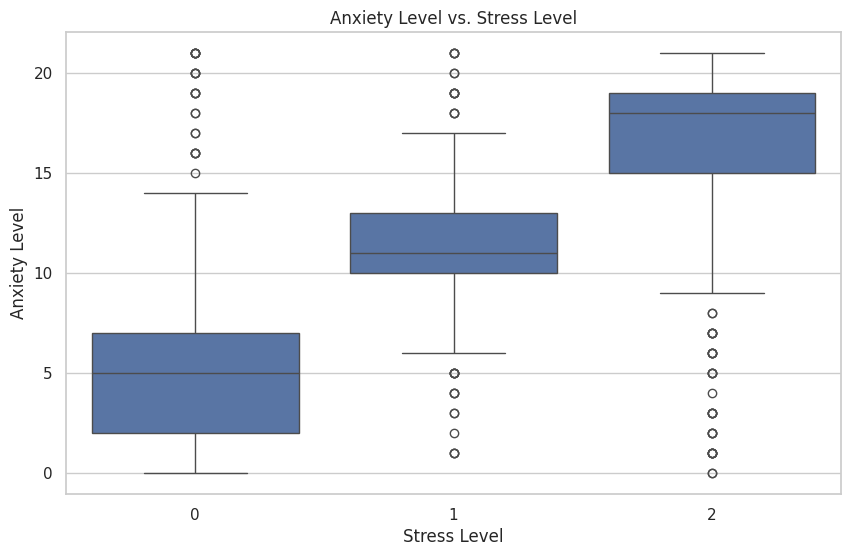

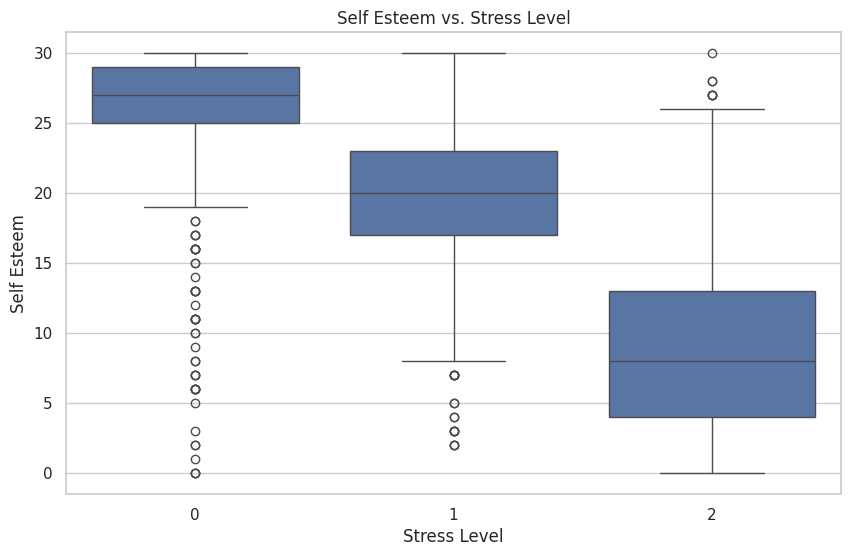

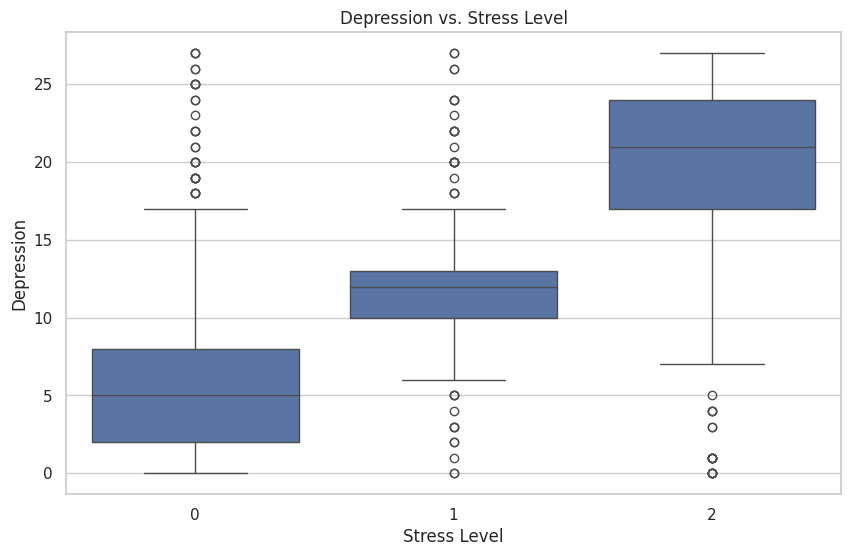

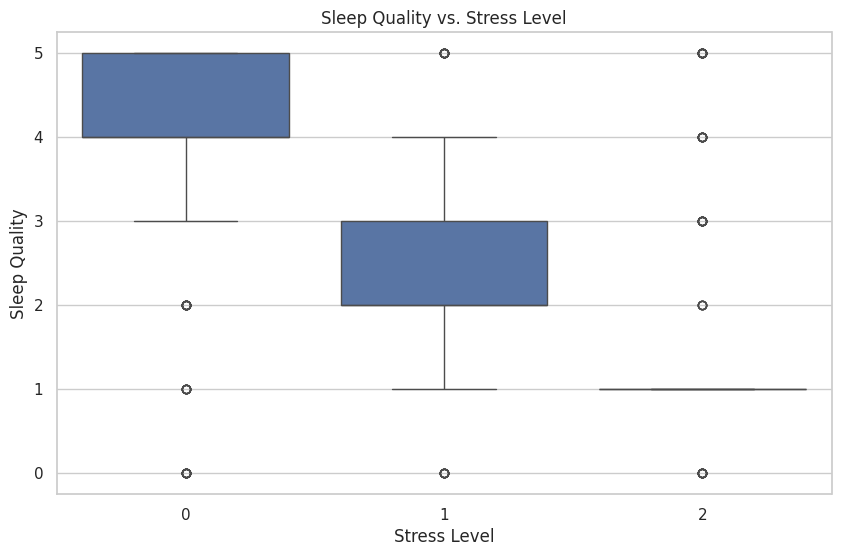

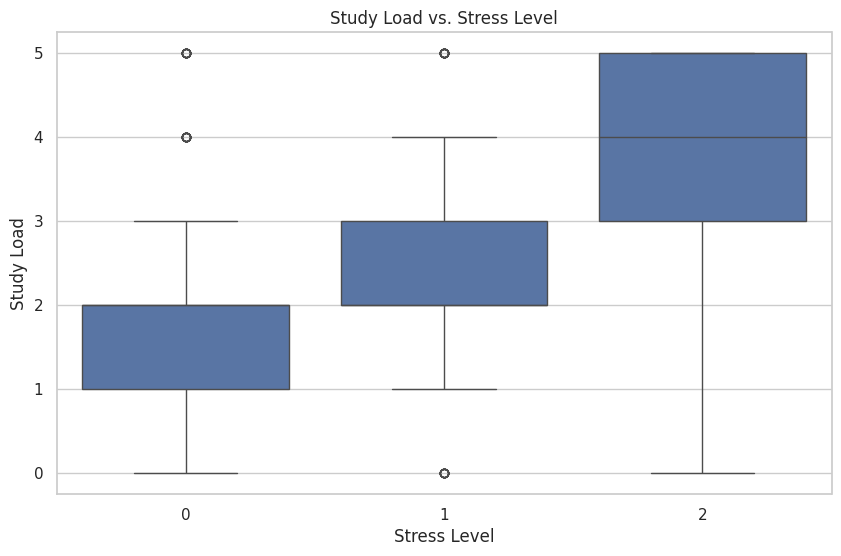

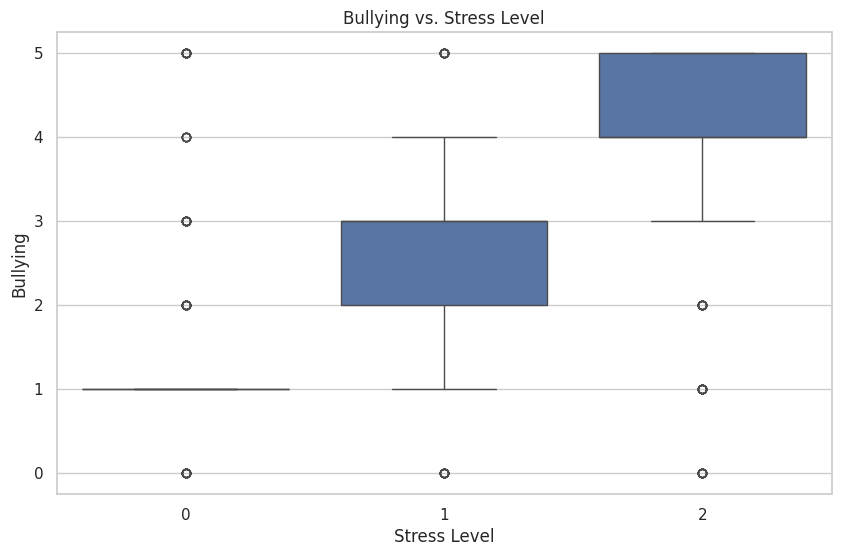

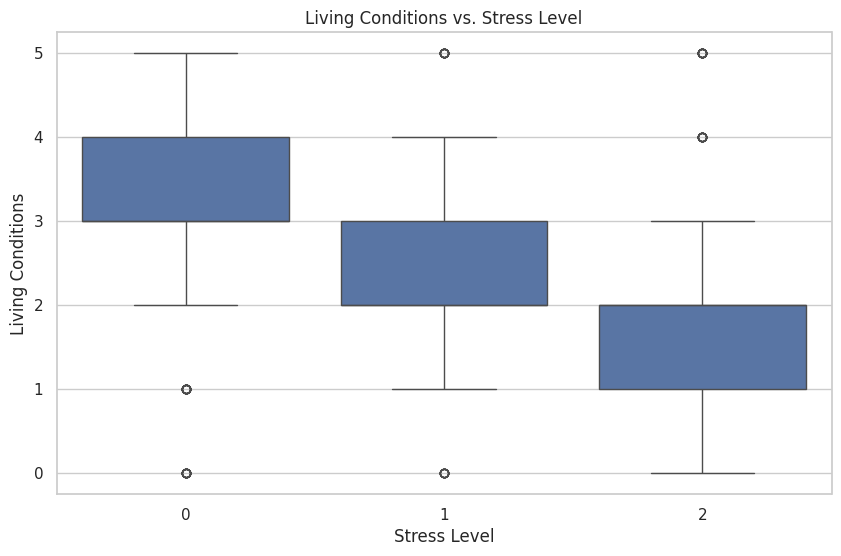

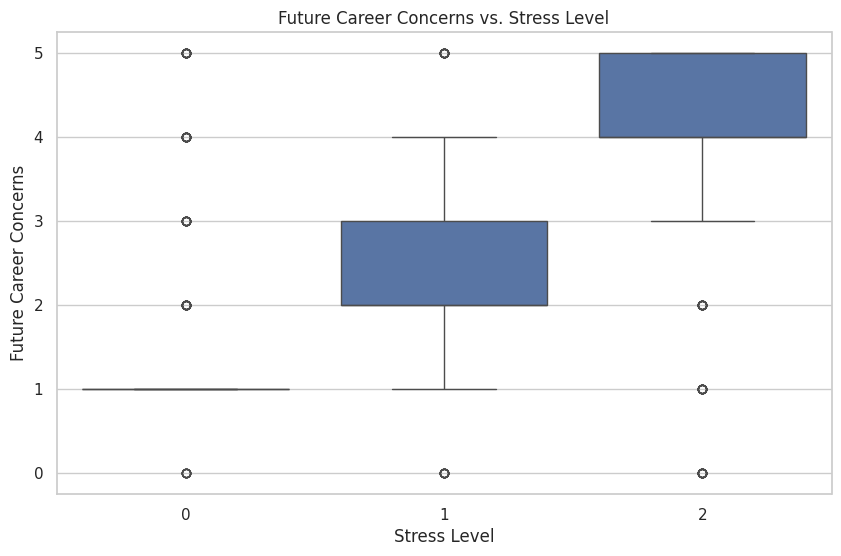

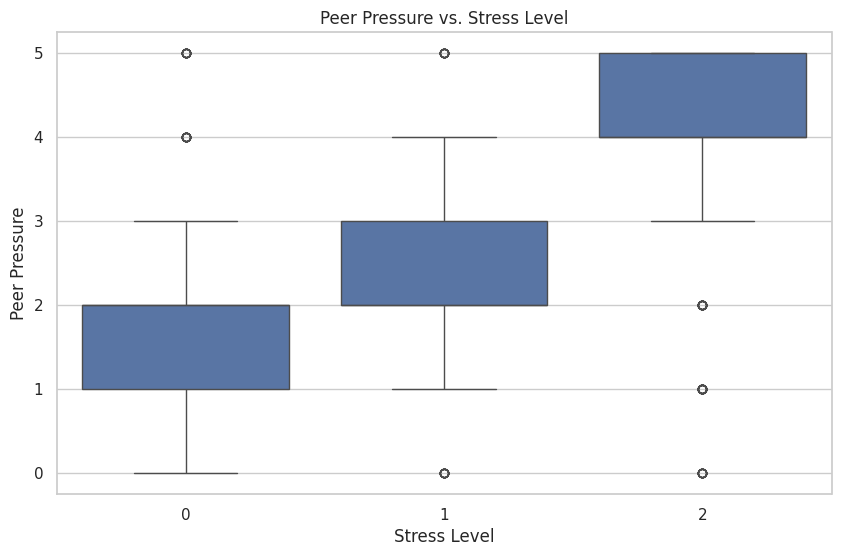

In [ ]:
# Explore relationship between stress level and some features

# Anxiety
sns.boxplot(x ='stress_level', y='anxiety_level', data=df)
plt.title('Anxiety Level vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Anxiety Level')
plt.show()

# Self-esteem
sns.boxplot(x ='stress_level', y='self_esteem', data=df)
plt.title('Self Esteem vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Self Esteem')
plt.show()

# Depression
sns.boxplot(x ='stress_level', y='depression', data=df)
plt.title('Depression vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Depression')
plt.show()

# Sleep Quality
sns.boxplot(x ='stress_level', y='sleep_quality', data=df)
plt.title('Sleep Quality vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Quality')
plt.show()

# Study Load
sns.boxplot(x ='stress_level', y='study_load', data=df)
plt.title('Study Load vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Study Load')
plt.show()

# Bullying
sns.boxplot(x ='stress_level', y='bullying', data=df)
plt.title('Bullying vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Bullying')
plt.show()

# Living Conditions
sns.boxplot(x ='stress_level', y='living_conditions', data=df)
plt.title('Living Conditions vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Living Conditions')
plt.show()

# Future Career Concerns
sns.boxplot(x ='stress_level', y='future_career_concerns', data=df)
plt.title('Future Career Concerns vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Future Career Concerns')
plt.show()

# Peer Pressure
sns.boxplot(x ='stress_level', y='peer_pressure', data=df)
plt.title('Peer Pressure vs. Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Peer Pressure')
plt.show()

**Summary**: Visual analysis shows clear trends. Factors like bullying and depression are positively correlated with stress, while sleep quality and academic performance are negatively correlated.

## 3. Feature Selection: Identifying Key Stress Factors

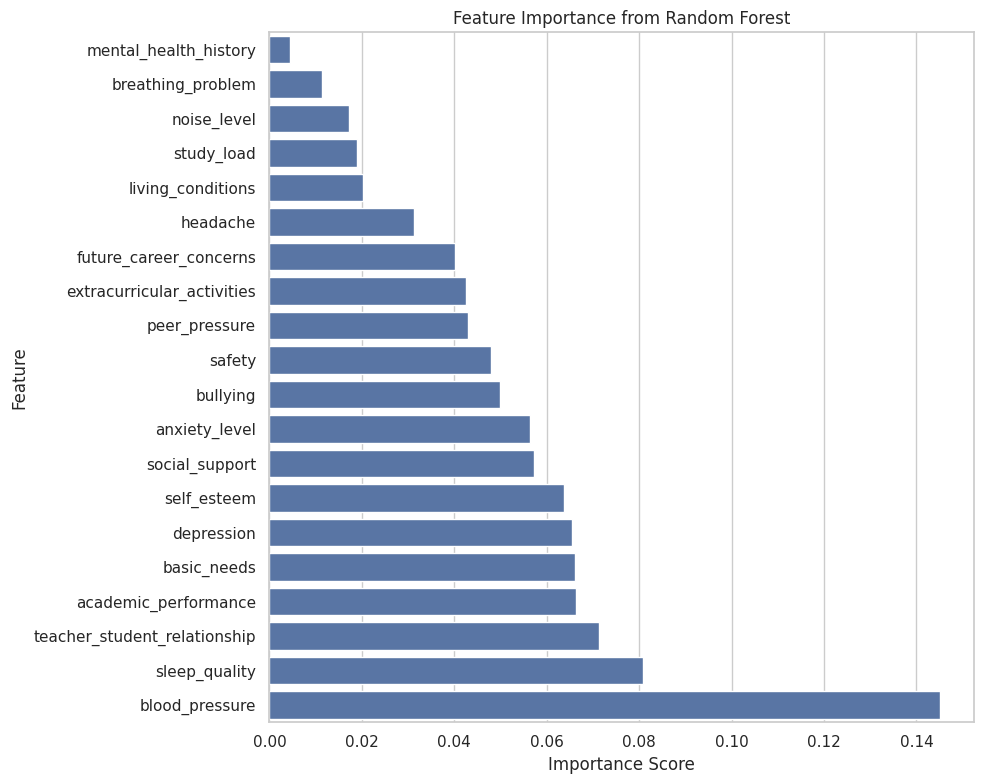

mental_health_history           0.004521
breathing_problem               0.011390
noise_level                     0.017141
study_load                      0.018958
living_conditions               0.020191
headache                        0.031334
future_career_concerns          0.040237
extracurricular_activities      0.042481
peer_pressure                   0.043071
safety                          0.048004
bullying                        0.049969
anxiety_level                   0.056321
social_support                  0.057248
self_esteem                     0.063838
depression                      0.065374
basic_needs                     0.066138
academic_performance            0.066403
teacher_student_relationship    0.071258
sleep_quality                   0.080919
blood_pressure                  0.145205
dtype: float64


In [ ]:
# Prepare data
X = df.drop('stress_level', axis=1)
y = df['stress_level']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=True)  # Sort for plotting

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
print(feature_importances)

In [ ]:
# Importance Feature using SelectKBest and ANOVA F-test
# Apply SelectKBest with ANOVA F-test
k_best = SelectKBest(score_func=f_classif, k='all')  # 'all' to rank everything
k_best.fit(X, y)

# Wrap in DataFrame for readability
anova_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': k_best.scores_
}).sort_values(by='F-Score', ascending=False)

print(anova_scores)

                         Feature      F-Score
5                 blood_pressure  1106.223910
1                    self_esteem   775.386130
19                      bullying   712.871269
6                  sleep_quality   710.124696
15        future_career_concerns   684.270952
0                  anxiety_level   655.453225
3                     depression   652.629287
12          academic_performance   639.222921
10                        safety   613.634750
11                   basic_needs   600.120070
4                       headache   570.226316
18    extracurricular_activities   549.800151
17                 peer_pressure   539.338954
14  teacher_student_relationship   513.033251
8                    noise_level   440.800303
16                social_support   430.279745
2          mental_health_history   398.486049
13                    study_load   372.595924
9              living_conditions   280.628543
7              breathing_problem   278.283522


In [ ]:
# Importance Feature using RFE with Random Forest
# Initialize Random Forest for RFE
rfe_model = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rfe_model, n_features_to_select=10, step=1)

# Fit RFE
rfe_selector.fit(X, y)

# Wrap in DataFrame
rfe_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe_selector.ranking_
}).sort_values(by='Ranking')

print(rfe_ranking)

                         Feature  Ranking
0                  anxiety_level        1
3                     depression        1
6                  sleep_quality        1
5                 blood_pressure        1
12          academic_performance        1
14  teacher_student_relationship        1
10                        safety        1
16                social_support        1
18    extracurricular_activities        1
19                      bullying        1
11                   basic_needs        2
17                 peer_pressure        3
15        future_career_concerns        4
4                       headache        5
1                    self_esteem        6
8                    noise_level        7
13                    study_load        8
9              living_conditions        9
7              breathing_problem       10
2          mental_health_history       11


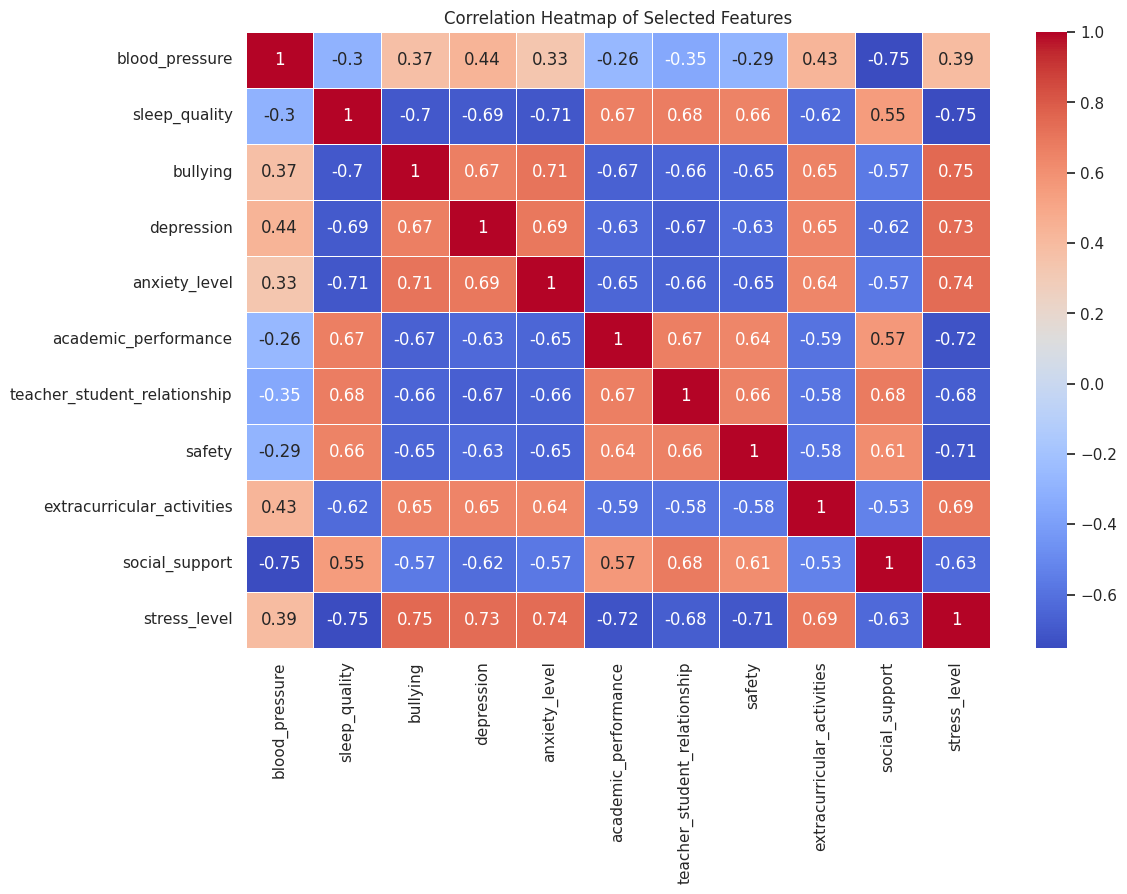

                              blood_pressure  sleep_quality  bullying  \
blood_pressure                      1.000000      -0.300323  0.370440   
sleep_quality                      -0.300323       1.000000 -0.699427   
bullying                            0.370440      -0.699427  1.000000   
depression                          0.436084      -0.693161  0.665790   
anxiety_level                       0.330867      -0.710292  0.709982   
academic_performance               -0.262785       0.671326 -0.666229   
teacher_student_relationship       -0.352123       0.677569 -0.655960   
safety                             -0.288354       0.657686 -0.645673   
extracurricular_activities          0.426254      -0.623092  0.651979   
social_support                     -0.752531       0.554553 -0.567078   
stress_level                        0.394200      -0.749068  0.751162   

                              depression  anxiety_level  academic_performance  \
blood_pressure                  0.436084  

In [ ]:
# Making correlation heatmap using selected features

# Selected top features + target
selected_features = [
    'blood_pressure', 'sleep_quality', 'bullying', 'depression', 'anxiety_level',
    'academic_performance', 'teacher_student_relationship', 'safety',
    'extracurricular_activities', 'social_support', 'stress_level'
]

# Subset the DataFrame
corr_df = df[selected_features]

# Compute correlation matrix
corr_matrix = corr_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()
print(corr_matrix)

In [ ]:
# --- Consolidated Data Preparation & Scaling ---

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Select the final features you identified
final_features = [
    'blood_pressure',
    'sleep_quality',
    'bullying',
    'depression',
    'anxiety_level',
    'academic_performance',
    'extracurricular_activities'
]

X = df[final_features] # Input features
y = df['stress_level'] # Target variable

# 2. Perform the single, stratified train-test split for all subsequent models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Initialize the StandardScaler
scaler = StandardScaler()

# 4. Fit the scaler ONLY on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# 5. Transform the test data using the SAME scaler
X_test_scaled = scaler.transform(X_test)

# --- Check the shapes to confirm ---
print("Shape of original training data:", X_train.shape)
print("Shape of scaled training data:", X_train_scaled.shape)
print("Shape of original test data:", X_test.shape)
print("Shape of scaled test data:", X_test_scaled.shape)

Shape of original training data: (880, 7)
Shape of scaled training data: (880, 7)
Shape of original test data: (220, 7)
Shape of scaled test data: (220, 7)


**Summary**: To identify the most impactful features, three methods were used. Based on their combined results, a final set of 7 features was selected for model training.

## 4. Model Building and Evaluation

Several classification models were trained to find the best performer. Models sensitive to feature scale (Logistic Regression, SVM, MLP) were trained on standardized data.

Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        74
           1       0.91      0.89      0.90        72
           2       0.91      0.91      0.91        74

    accuracy                           0.89       220
   macro avg       0.89      0.89      0.89       220
weighted avg       0.89      0.89      0.89       220



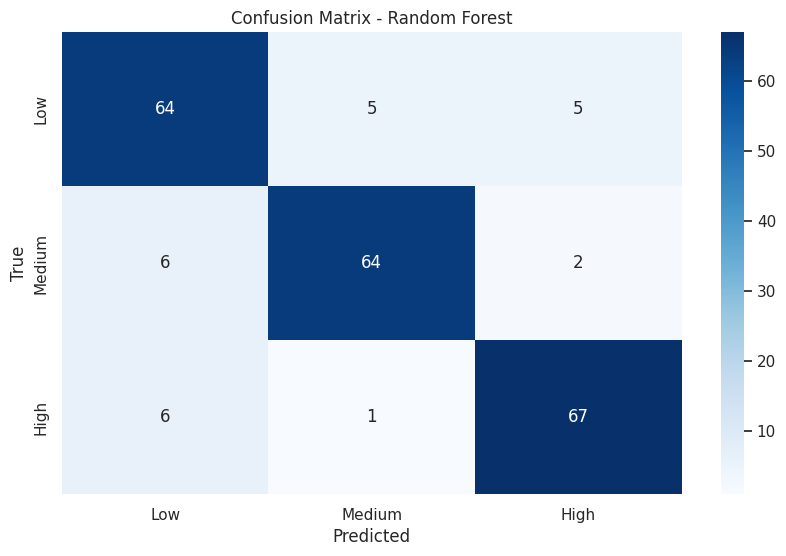

[[64  5  5]
 [ 6 64  2]
 [ 6  1 67]]


In [ ]:
# Train Model and Evaluation (Random Forest Model)

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on Test Data
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()
print(cm)

Accuracy: 0.89

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88        74
           1       0.98      0.89      0.93        72
           2       0.86      0.88      0.87        74

    accuracy                           0.89       220
   macro avg       0.90      0.89      0.89       220
weighted avg       0.90      0.89      0.89       220



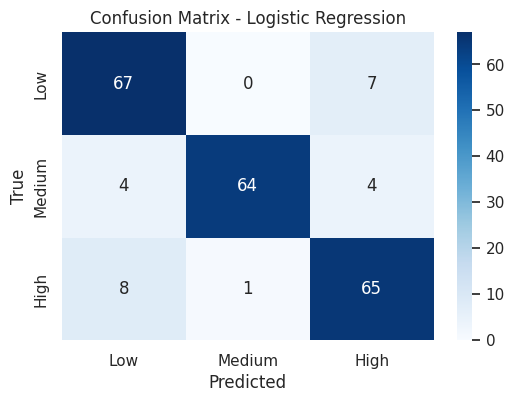

[[67  0  7]
 [ 4 64  4]
 [ 8  1 65]]


In [ ]:
# Train Model and Evaluation (Logistic Regression)

from sklearn.linear_model import LogisticRegression

# Initialize the model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Predict on Test Data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Accuracy:", round(accuracy_lr, 2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()
print(cm_lr)

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        74
           1       0.96      0.90      0.93        72
           2       0.86      0.89      0.87        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



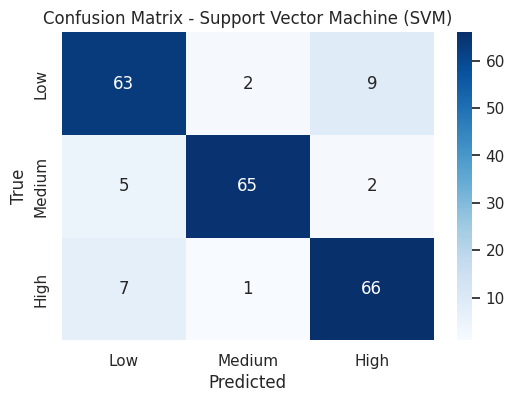

[[63  2  9]
 [ 5 65  2]
 [ 7  1 66]]


In [ ]:
# Train Model and Evaluation (SVM)

from sklearn.svm import SVC

# Initialize the model
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on Test Data
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", round(accuracy_svm, 2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

# Confusion Matrix Visualization
plt.figure(figsize=(6,4))
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine (SVM)')
plt.show()
print(cm_svm)

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.86        74
           1       0.88      0.89      0.88        72
           2       0.93      0.86      0.90        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



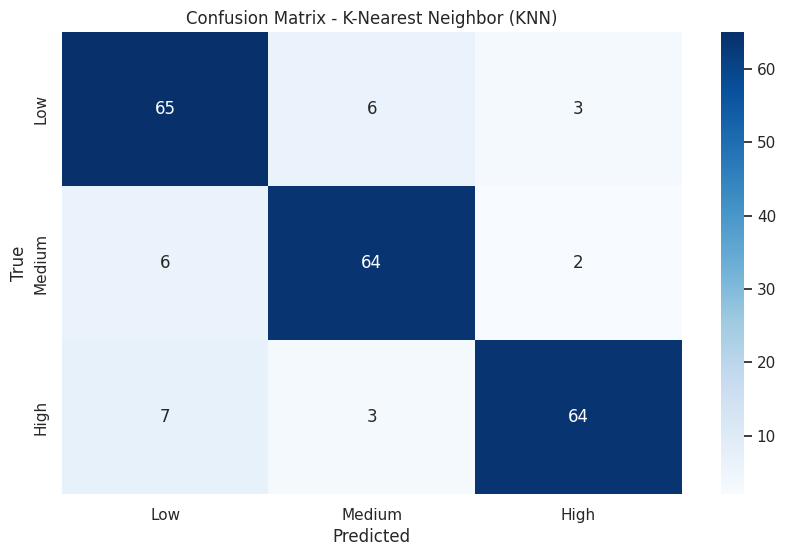

[[65  6  3]
 [ 6 64  2]
 [ 7  3 64]]


In [ ]:
# Train Model and Evaluation (K-Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier

# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", round(accuracy_knn, 2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))

# Confusion Matrix and its Visualization
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - K-Nearest Neighbor (KNN)')
plt.show()
print(cm_knn)

Accuracy: 0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86        74
           1       0.88      0.89      0.88        72
           2       0.89      0.89      0.89        74

    accuracy                           0.88       220
   macro avg       0.88      0.88      0.88       220
weighted avg       0.88      0.88      0.88       220



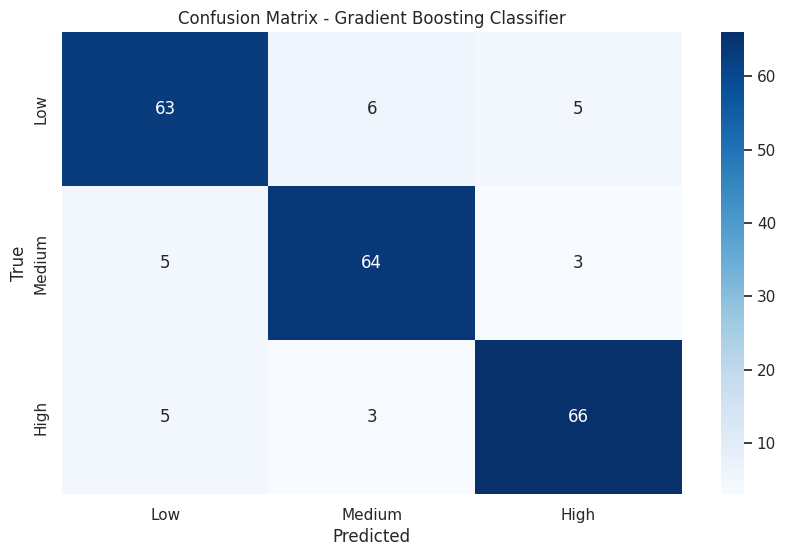

[[63  6  5]
 [ 5 64  3]
 [ 5  3 66]]


In [ ]:
# Train Model and Evaluation (K-Nearest Neighbor)

from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on Test Data
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", round(accuracy_gb, 2))

print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))

# Confusion Matrix and its Visualization
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()
print(cm_gb)

Accuracy:  0.88

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.78      0.84        74
           1       1.00      0.89      0.94        72
           2       0.77      0.96      0.86        74

    accuracy                           0.88       220
   macro avg       0.89      0.88      0.88       220
weighted avg       0.89      0.88      0.88       220



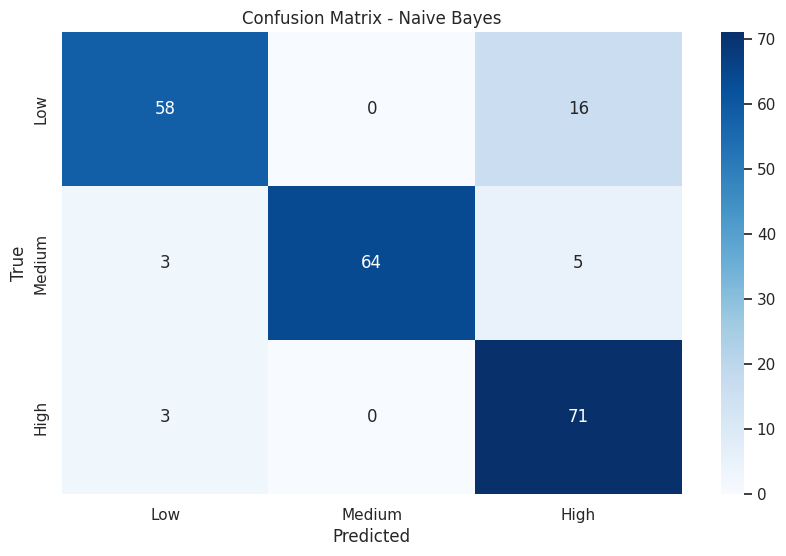

[[58  0 16]
 [ 3 64  5]
 [ 3  0 71]]


In [ ]:
# Training, Testing and Evaluating Model: Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Initialize the model
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict the model against the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate models using accuracy, classification report, and confusion matrix
# Accuracy
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy: ", round(accuracy_nb,2))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()
print(cm_nb)

Accuracy:  0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        74
           1       0.87      0.90      0.88        72
           2       0.89      0.89      0.89        74

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



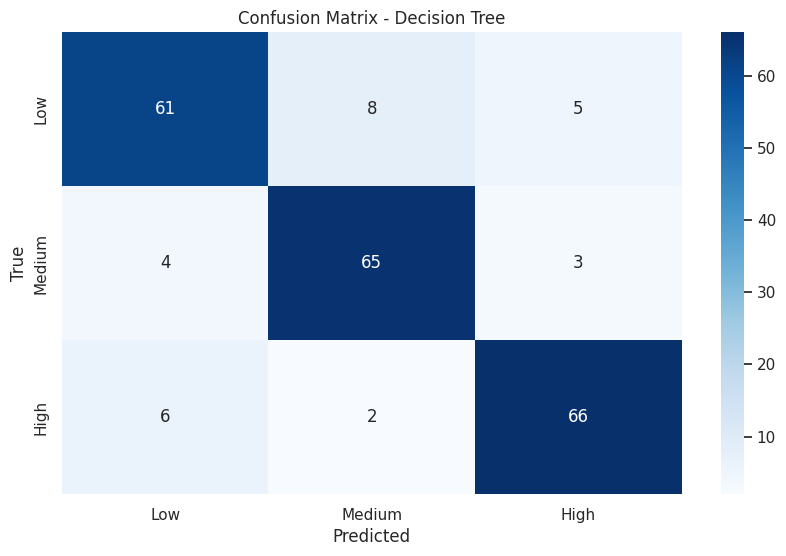

[[61  8  5]
 [ 4 65  3]
 [ 6  2 66]]


In [ ]:
# Training, Testing and Evaluating Model: Decision Tree

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize the model (default parameters for fair comparison)
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict the model against the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate models using accuracy, classification report, and confusion matrix
# Accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy: ", round(accuracy_dt, 2))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()
print(cm_dt)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy:  0.87

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84        74
           1       0.93      0.90      0.92        72
           2       0.83      0.86      0.85        74

    accuracy                           0.87       220
   macro avg       0.87      0.87      0.87       220
weighted avg       0.87      0.87      0.87       220



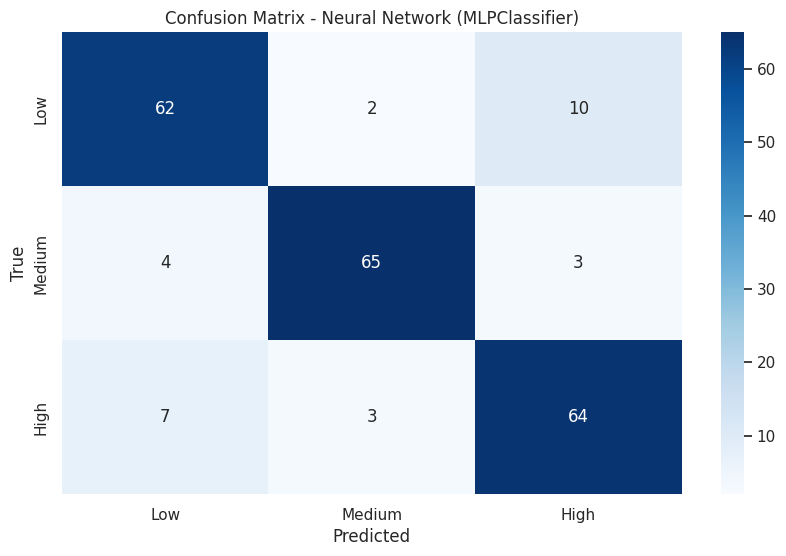

[[62  2 10]
 [ 4 65  3]
 [ 7  3 64]]


In [ ]:
# Training, Testing and Evaluating Model: Neural Network (MLPClassifier)

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Initialize the model with default parameters
mlp_model = MLPClassifier(random_state=42, max_iter=300)  # default params + higher max_iter for convergence

# Train the model
mlp_model.fit(X_train_scaled, y_train)

# Predict the model against the test set
y_pred_mlp = mlp_model.predict(X_test_scaled)

# Evaluate models using accuracy, classification report, and confusion matrix
# Accuracy
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("Accuracy: ", round(accuracy_mlp, 2))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Neural Network (MLPClassifier)')
plt.show()
print(cm_mlp)

## 5. Hyperparameter Tuning & Final Model Selection

In [ ]:
# Random Forest is chosen because of its high accuracy (89%) and balance
# Fine-tuning is needed though, so we can potentially increase its performance

from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Initialize the GridSearchCV object
# estimator: The model you want to tune.
# param_grid: The hyperparameters you defined above.
# cv=5: Use 5-fold cross-validation.
# n_jobs=-1: Use all available CPU cores to speed up the process.
# verbose=2: Print progress updates so you can see it working.
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2
)

# 4. Fit the grid search to your training data
# This will test all combinations and can take a few minutes
print("Performing grid search...")
grid_search.fit(X_train, y_train)

# 5. Print the best parameters found
print("\nBest Parameters found: ")
print(grid_search.best_params_)

# 6. Get the best model from the search
best_rf_model = grid_search.best_estimator_

Performing grid search...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best Parameters found: 
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        74
           1       0.94      0.90      0.92        72
           2       0.82      0.88      0.85        74

    accuracy                           0.86       220
   macro avg       0.87      0.86      0.86       220
weighted avg       0.87      0.86      0.86       220



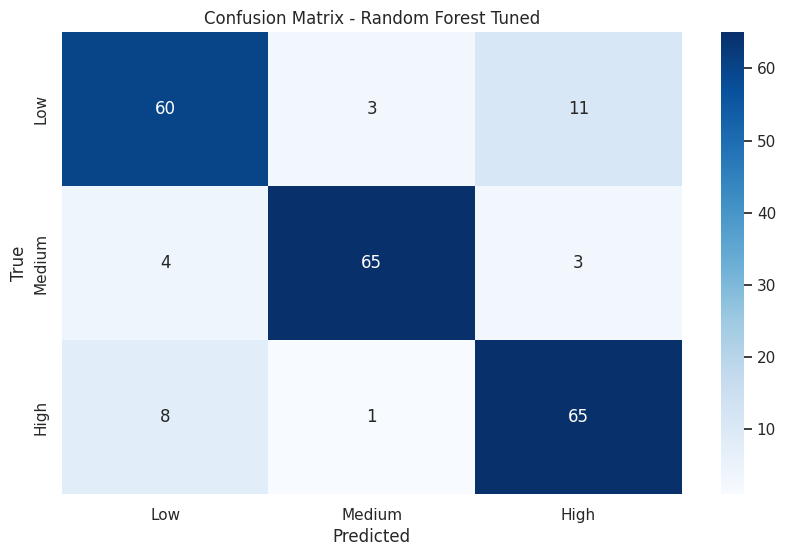

[[60  3 11]
 [ 4 65  3]
 [ 8  1 65]]


In [ ]:
# Train Model and Evaluation after Fine-tuning (Random Forest Model)

# Initialize the model
rf_model_tuned = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100)

# Train the model
rf_model_tuned.fit(X_train, y_train)

# Predict on Test Data
y_pred_tuned = rf_model_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"Accuracy: {accuracy_tuned:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))

# Confusion matrix visualization
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', xticklabels = ['Low', 'Medium', 'High'], yticklabels = ['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest Tuned')
plt.show()
print(cm_tuned)

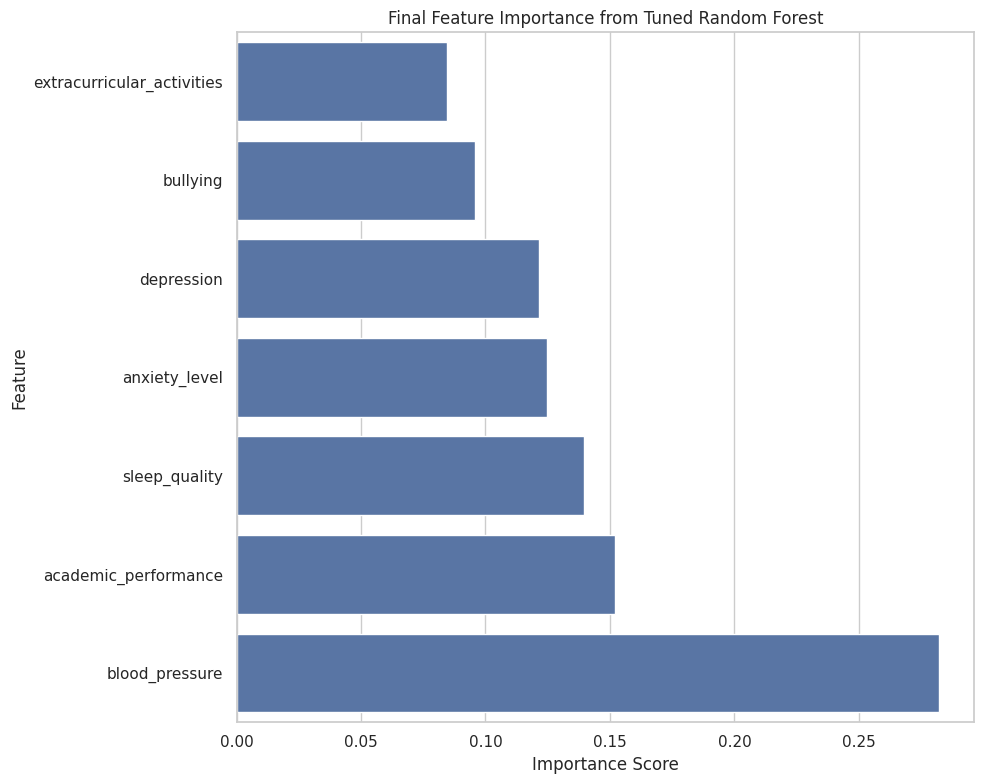

Feature importances from the tuned model:
blood_pressure                0.282103
academic_performance          0.152005
sleep_quality                 0.139372
anxiety_level                 0.124559
depression                    0.121581
bullying                      0.095652
extracurricular_activities    0.084728
dtype: float64


In [ ]:
# --- Final Feature Importance from the Tuned Model ---

# The 'best_rf_model' is the final model from GridSearchCV
# The 'X' DataFrame should have your 7 final features

# Extract feature importances from the best model
final_importances = pd.Series(best_rf_model.feature_importances_, index=X.columns)
final_importances = final_importances.sort_values(ascending=True)

# Plot the final feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=final_importances, y=final_importances.index)
plt.title('Final Feature Importance from Tuned Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Print the sorted importance values
print("Feature importances from the tuned model:")
print(final_importances.sort_values(ascending=False))

**Summary**: The Random Forest model was selected and tuned using GridSearchCV, resulting in a robust final model with an accuracy of 86%.

## 6. In-Depth Analysis of the Final Model

SHAP Summary Plot:


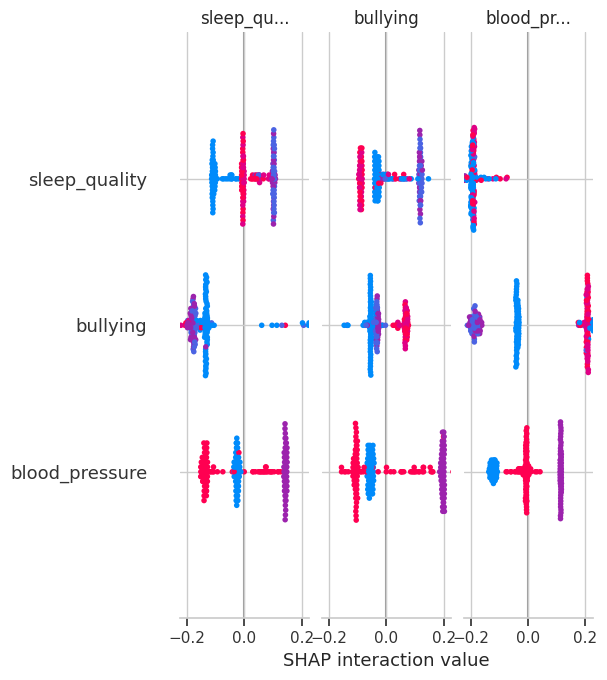

In [ ]:
# Using SHAP (SHapley Additive exPlanations) to further explain every single prediction

# Import the SHAP library
import shap

# Create a SHAP explainer object using your tuned Random Forest model
# The explainer learns from the training data to understand the model's behavior
explainer = shap.TreeExplainer(rf_model_tuned)

# Calculate SHAP values for the test data. This can take a moment.
shap_values = explainer.shap_values(X_test)

# Create a summary plot to see the global impact of features
# This plot combines feature importance with feature effects.
print("SHAP Summary Plot:")
shap.summary_plot(shap_values, X_test, class_names=['Low Stress', 'Medium Stress', 'High Stress'])

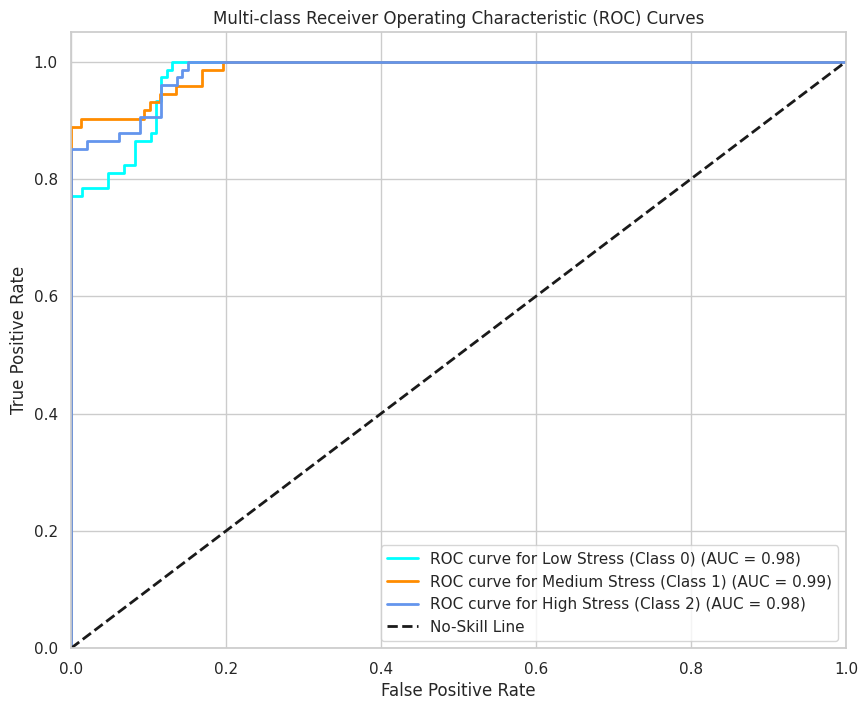

In [ ]:
# Evaluating with ROC Curves and AUC

# Import necessary libraries
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Your y_test contains the true labels (0, 1, 2)
# We need to binarize them to plot one curve per class
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Get the prediction probabilities from your tuned model
# This gives the probability for each class for each student
y_score = rf_model_tuned.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range (n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
  roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC Curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
class_names = ['Low Stress (Class 0)', 'Medium Stress (Class 1)', 'High Stress (Class 2)']

for i, color, name in zip(range(n_classes), colors, class_names):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve for {0} (AUC = {1:0.2f})'
             ''.format(name, roc_auc[i]))

# Plot the "no-skill" line (a random guess)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='No-Skill Line')

# --- Final Plot Styling ---
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

**Summary**: In-depth analysis of the tuned model confirms that physiological and social factors are the strongest predictors. Notably, a strong interaction effect was found between bullying and sleep quality.

## Conclusion and Key Takeaways

This analysis successfully developed a Random Forest model to predict student stress levels with a robust accuracy of **86%** after hyperparameter tuning and cross-validation.

The key insights derived from the model are:

* **Most Important Predictors**: The model's decisions are most heavily influenced by a combination of physiological, social, and psychological factors. The top predictors include **blood pressure**, **sleep quality**, and experiences with **bullying**.

* **Critical Interaction Effect**: A crucial insight from the SHAP analysis is the interaction between social and physiological factors. The negative impact of **bullying** on a student's stress is significantly **amplified by poor sleep quality**. This suggests that these factors do not act in isolation and their combined effect is particularly potent.

* **Protective Factors**: Conversely, good **sleep quality** and strong **social support** appear to act as protective buffers, helping to mitigate the effects of other stressors.

### Actionable Recommendations

Based on these findings, the following recommendations can be made for educational institutions:

1.  **Enhance Wellness Programs**: Focus on holistic wellness that includes education on **sleep hygiene**, not just traditional mental health support.
2.  **Strengthen Anti-Bullying Initiatives**: Given its high importance, continue to invest in and monitor the effectiveness of anti-bullying campaigns.
3.  **Promote Social Support Networks**: Foster environments and programs that strengthen peer and faculty social support systems to build student resilience.

## Saving the model and then creating a simple front-end using Gradio

In [ ]:
# Saving the model using Joblib

# Import necessary library
import joblib

# Define the filename for the model
stress_predict = "stress_predict.joblib"

# Save the model to a file
joblib.dump(rf_model_tuned, stress_predict)

print(f"Model saved successfully to '{stress_predict}'")

Model saved successfully to 'stress_predict.joblib'


In [ ]:
# Test the saved model

loaded_model = joblib.load(stress_predict)

# Let's test the loaded model on the first student in your test set
sample_student = X_test.iloc[[0]]
prediction = loaded_model.predict(sample_student)

# Map the prediction to a meaningful label
stress_levels = {0: 'Low Stress', 1: 'Medium Stress', 2: 'High Stress'}
predicted_stress_level = stress_levels[prediction[0]]

print(f"\nTest prediction for the first student:")
print(f"Feature values: \n{sample_student.to_string()}")
print(f"\nPredicted Stress Level: {predicted_stress_level} (Class {prediction[0]})")


Test prediction for the first student:
Feature values: 
     blood_pressure  sleep_quality  bullying  depression  anxiety_level  academic_performance  extracurricular_activities
150               2              5         1           1              8                     5                           2

Predicted Stress Level: Low Stress (Class 0)


In [ ]:
import gradio as gr
import joblib
import pandas as pd

# --- 1. Load your trained model and define labels ---

# Load the model you saved earlier
model = joblib.load('stress_predict.joblib')

# Define the human-readable labels for the output
stress_levels = {0: 'Low Stress', 1: 'Medium Stress', 2: 'High Stress'}


# --- 2. Create the prediction function ---

# This function takes the 7 feature inputs from the UI and returns the prediction.
def predict_stress(blood_pressure, sleep_quality, bullying, depression, anxiety_level, academic_performance, extracurricular_activities):

    # Create a pandas DataFrame from the user inputs
    # The model expects the data in the same order as your training data
    input_data = pd.DataFrame({
        'blood_pressure': [blood_pressure],
        'sleep_quality': [sleep_quality],
        'bullying': [bullying],
        'depression': [depression],
        'anxiety_level': [anxiety_level],
        'academic_performance': [academic_performance],
        'extracurricular_activities': [extracurricular_activities]
    })

    # Make a prediction using the loaded model
    prediction = model.predict(input_data)

    # Get the predicted probability for the predicted class
    prediction_proba = model.predict_proba(input_data)
    confidence = prediction_proba[0][prediction[0]]

    # Get the human-readable stress level
    predicted_stress_level = stress_levels[prediction[0]]

    # Return the final prediction string
    return f"Predicted Stress Level: {predicted_stress_level} (Confidence: {confidence:.2%})"


# --- 3. Build the Gradio Interface ---

# gr.Interface will create the UI for us.
# fn: The prediction function to call.
# inputs: A list of components for the user to provide input. We use sliders for the numerical features.
# outputs: The component to display the result (in this case, a text label).
# title/description: Text to make the UI user-friendly.

app = gr.Interface(
    fn=predict_stress,
    inputs=[
        gr.Slider(minimum=1, maximum=3, step=1, label="Blood Pressure (1: Low, 2: Normal, 3: High)"),
        gr.Slider(minimum=0, maximum=5, step=1, label="Sleep Quality (Scale 0-5)"),
        gr.Slider(minimum=0, maximum=5, step=1, label="Bullying Frequency (Scale 0-5)"),
        gr.Slider(minimum=0, maximum=27, step=1, label="Depression Score (Scale 0-27)"),
        gr.Slider(minimum=0, maximum=21, step=1, label="Anxiety Level Score (Scale 0-21)"),
        gr.Slider(minimum=0, maximum=5, step=1, label="Academic Performance (Scale 0-5)"),
        gr.Slider(minimum=0, maximum=5, step=1, label="Extracurricular Activities Frequency (Scale 0-5)")
    ],
    outputs=gr.Label(label="Prediction Result"),
    title="🎓 Student Stress Level Predictor",
    description="This app uses a Random Forest model to predict a student's stress level based on key psychological, physiological, and social factors. Adjust the sliders to see the prediction.",
    allow_flagging="never"
)

# --- 4. Launch the App ---
# This will create a local web server and a public link (if running in a cloud notebook like Colab)
app.launch()

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:425: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://972aa0d296569c70e7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
